In [1]:
import jax
import jax_metrics as jm
import jax.numpy as jnp
from jax import grad, jit, vmap
from functools import partial
from jax import random
import os
import numpy as np
import matplotlib.pyplot as plt
os.environ['XLA_PYTHON_CLIENT_PREALLOCATE'] = 'false'
os.environ['XLA_PYTHON_CLIENT_ALLOCATOR'] = 'platform'

# Basic Linear Model

This is a clase with the following methods:

1. generate_canonical_estimator - self explanatory
$$$$

In [40]:
class Linear_Model():
    """
    Basic Linear Regression with Ridge Regression
    """
    def __init__(self, dim: int) -> None:
        self.dim = dim
        self.key = random.PRNGKey(0)
    
    # The classic one
    def generate_canonical_estimator(self, X: jnp, y:jnp) -> jnp:
        return  jax.numpy.linalg.inv(jax.numpy.transpose(X)@X)@jax.numpy.transpose(X)@y
    
    @staticmethod
    @jit
    def linear_model(X: jnp, theta: jnp) -> jnp:
        w = theta[:-1]
        b = theta[-1]
        return jax.numpy.matmul(X, w) + b
    
    @partial(jit, static_argnums=(0,))
    def LSE(self, theta: jnp, X: jnp, y: jnp)-> jnp:
        return (jax.numpy.transpose(y - self.linear_model(X, theta))@(y - self.linear_model(X, theta)))[0,0]
    
    @partial(jit, static_argnums=(0,))
    def update(self, theta: jnp, X: jnp, y: jnp, lr):
        return theta - lr * jax.grad(self.LSE)(theta, X, y)  

    def generate_w_aug(self):
        keys = random.split(self.key, 1)
        return jax.numpy.vstack([random.normal(keys, (self.dim,1)), jax.numpy.array(1)])
    
    def generate_theta(self):
        keys = random.split(self.key, 1)
        return jax.numpy.vstack([random.normal(keys, (self.dim,1)), jax.numpy.array(0)])
    
    @partial(jit, static_argnums=(0,))
    def estimate_grsl(self, X, theta):
        w = theta[:-1]
        b = theta[-1]
        return X@w+b
    
    def gradient_descent(self, theta: jnp,  X: jnp, y: jnp, n_steps: int, lr = 0.001):
        for i in range(n_steps):
            theta = self.update(theta, X, y, lr)
        return theta
         

# Generate Data

In [41]:
X1 = np.random.normal(size=(100,2))
X2 = np.random.normal(size=(100,2))+(5,5)

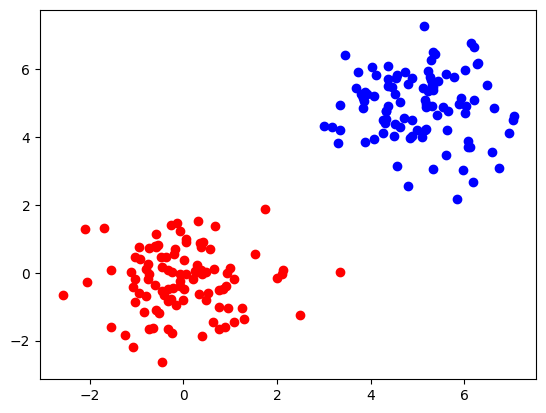

In [42]:
plt.figure()
plt.plot(X1[:,0], X1[:,1], 'ro')
plt.plot(X2[:,0], X2[:,1], 'bo')

In [43]:
X1_e = np.hstack([X1, np.ones((100,1))])
X2_e = np.hstack([X2, np.ones((100,1))])

In [44]:
X_e = np.vstack([X1_e, X2_e])
X = np.vstack([X1, X2])

In [45]:
y = np.vstack([-np.ones((100, 1)), np.ones((100, 1))])

In [46]:
model = Linear_Model(2)

In [47]:
theta = model.generate_theta()

In [48]:
theta = model.gradient_descent(theta, X, y, 100, lr = 0.0001)

In [49]:
theta

Array([[ 0.16866845],
       [ 0.18528208],
       [-0.81697524]], dtype=float32)

In [53]:
est = model.estimate_grsl(X, theta)

In [54]:
sum(est>0)

Array([100], dtype=int32, weak_type=True)

In [55]:
sum(est<0)

Array([100], dtype=int32, weak_type=True)